In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

importing file

In [2]:
#importing  and cleaning the file

file_filter=pd.read_csv('pulseCheck Data 2023-01-10 11-47-12.txt', encoding= 'unicode_escape') #removing unicode decoding error from encoding
file=file_filter["# 2023-01-10T11:47:12+08:00"].str.split( "\t ", n = 1,  expand=True)[18:] # removing the 18 header rows
 
file=file[0].str.split('\t', n = 1,  expand=True).astype('float') # romving '\t' of data and separting the data into two columns and converting into float



In [3]:
#importing  and cleaning the 2nd file

file_filter1=pd.read_csv('pulseCheck Data 2023-01-10 11-46-57.txt', encoding= 'unicode_escape') #removing unicode decoding error from encoding
file1=file_filter1["# 2023-01-10T11:46:57+08:00"].str.split( "\t ", n = 1,  expand=True)[18:] # removing the 18 header rows
 
file1=file1[0].str.split('\t', n = 1,  expand=True).astype('float') # romving '\t' of data and separting the data into two columns and converting into float




In [83]:
x=file[0] # 1st column gives time

y=file[1]  # 2nd column gives intensity


print(y.iloc[2])
y_half  =( max(y)-min(y))/2 + min(y)



# going from point to point
for i in range(0,len(y)-1):

#     #to find the left edge of FWHM   
    if y.iloc[i]<y_half:
        if y.iloc[i+1]>=y_half:
            print(y.iloc[i],'l_val')
            leftedge=i
            print(x[leftedge],leftedge,'left')
    #to find the  right edge of FWHM
    if y.iloc[i]>=y_half:
        if y.iloc[i+1]<y_half:
            print(y.iloc[i],'rval')
            rightedge=i
            print(x[rightedge],rightedge,'right')
            

            
#fwhm of time scale

x_half=x[rightedge]-x[leftedge]

print(x_half)
# t_hf= np.linspace(-0.2,0.2,100)

t=x_half/1.177


print(t)

0.03431223
0.05755017 l_val
-0.132379 4135 left
0.05758293 rval
0.15533 6053 right
0.287709
0.24444265080713679


In [5]:
xy = []
for i, val in enumerate(x):
    if i >= 18:
        xy.append(x[i] * y[i])

          
x_sqrt = [i**2 for i in x]
n=len(x)


# We can then calculate the w (slope) and b (intercept) terms using the above formula:

w = (n*sum(xy) - sum(x)*sum(y)) / (n*sum(x_sqrt) - sum(x)**2)
b = (sum(y) - w*sum(x))/n

print('slope is',w,'& intercept is',b)


slope is 0.00030592811183952344 & intercept is 0.044216625644684794


In [6]:
#another method to find slope and intercept of line regress

res=sc.stats.linregress(x,y)
print('slope is', res.slope,'& intercept is', res.intercept)
print('std_error is', res.stderr)
print('std_deviation is ',res.stderr*np.sqrt(n))

slope is 0.0005562354438795613 & intercept is 0.04421662565179049
std_error is 0.00033420081813683556
std_deviation is  0.033420081813683555


[ 0.17140414  0.02253378 -0.96491093] popt
[2.18495464e-04 2.31523817e-05 1.81985536e-05] std
[[ 4.77402678e-08 -1.87850806e-09 -1.78133767e-09]
 [-1.87850806e-09  5.36032777e-10 -1.17092422e-10]
 [-1.78133767e-09 -1.17092422e-10  3.31187355e-10]] pcov
0.20174267226648965 pulse width


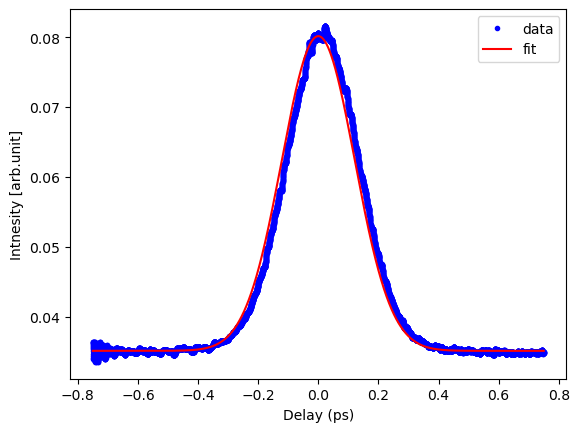

In [84]:
x=file[0] # 1st column gives time
y=file[1]  # 2nd column gives intensity

#plotting time vs intensity

plt.xlabel('Delay (ps)')
plt.ylabel('Intnesity [arb.unit]')

plt.plot(x,y,'b.', label='data', linewidth=0.5)

# plt.axhline(y=y_half,color='r')





# curve fitting
# optimize import curve_fit

from scipy.optimize import curve_fit


def func(t, t_g,c,d):
    return 1+2*np.exp(-((t)/t_g)**2)*c+d


# plt.plot(x, ydata, 'b-', label='data')



popt, pcov = curve_fit(func, x,y,  p0=(0.1,0.1,0) )
print(popt,'popt')
plt.plot(x, func(x, *popt), 'r-',label='fit')
# print(popt,pcov)
perr = np.sqrt(np.diag(pcov))
print(perr,'std')
print(pcov,'pcov')


t_p=popt[0]*1.177
print(t_p,'pulse width')

# plt.xlim(-0.2,0.2)
plt.legend()
plt.show()



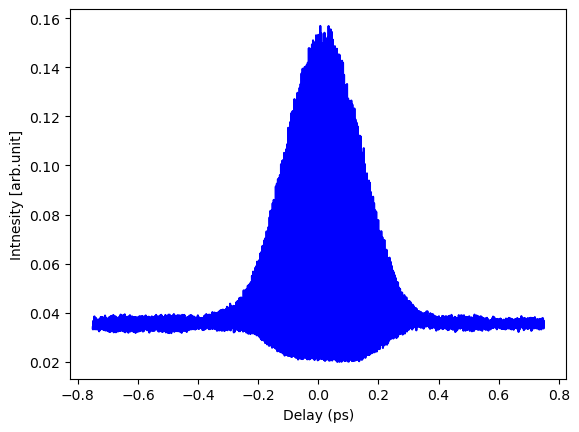

In [8]:
#second file plotting

x_1=file1[0] # 1st column gives time
y_1=file1[1]  # 2nd column gives intensity

#plotting time vs intensity

plt.xlabel('Delay (ps)')
plt.ylabel('Intnesity [arb.unit]')

plt.plot(x_1,y_1, 'b-')



plt.show()

11
